In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
data_path=r"E:\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2"

In [172]:
# Load datasets
orders = pd.read_csv(os.path.join(data_path, 'olist_orders_dataset.csv'))
customers = pd.read_csv(os.path.join(data_path, 'olist_customers_dataset.csv'))
order_items = pd.read_csv(os.path.join(data_path, 'olist_order_items_dataset.csv'))
products = pd.read_csv(os.path.join(data_path, 'olist_products_dataset.csv'))
sellers = pd.read_csv(os.path.join(data_path, 'olist_sellers_dataset.csv'))
reviews = pd.read_csv(os.path.join(data_path, 'olist_order_reviews_dataset.csv'))
geolocation = pd.read_csv(os.path.join(data_path, 'olist_geolocation_dataset.csv'))
payments = pd.read_csv(os.path.join(data_path, 'olist_order_payments_dataset.csv'))
product_CNT=pd.read_csv(os.path.join(data_path,'product_category_name_translation.csv'))

## 1.Data Exploration

#### Orders Table

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders.info()
orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [6]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Customers Table

In [7]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
customers.info()
customers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### order_Items Table

In [9]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
order_items.info()
order_items.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [11]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### products Table

In [12]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
products.info()
products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

#### Sellers Table

In [14]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [15]:
sellers.info()
sellers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

#### Orders Review

In [16]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [17]:
reviews.info()
reviews.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### Geolocation Table

In [18]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [19]:
geolocation.info()
geolocation.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

#### Order_Payments Table

In [20]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [21]:
payments.info()
payments.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [22]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


## Data Cleaning and Preprocessing

#### 1. Handle Missing Values

In [23]:
# Percentage of missing values for each dataset
datasets = [orders, customers, order_items, products, sellers, reviews, geolocation, payments]
dataset_names = ['orders', 'customers', 'order_items', 'products', 'sellers', 'reviews', 'geolocation', 'payments']

for i, dataset in enumerate(datasets):
    print(f"{dataset_names[i]} missing values:")
    print(dataset.isnull().sum(), "\n")


orders missing values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

customers missing values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

order_items missing values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

products missing values:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm   

In [24]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Orders Table:

In [25]:
orders['order_approved_at']=orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])

In [26]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [27]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [28]:
orders['order_delivered_customer_date'] = orders.apply(
    lambda row: row['order_estimated_delivery_date'] if row['order_status'] == 'delivered' 
    else np.nan, axis=1
)

Product Table:

In [29]:
pd.isnull(products).sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [30]:
products.product_category_name=products.product_category_name.fillna("Unknown")

In [31]:
products.product_name_lenght=products.product_name_lenght.median

In [32]:
products.product_description_lenght=products.product_description_lenght.median

In [33]:
products.product_photos_qty=products.product_photos_qty.median

In [34]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [35]:
products.loc[products.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,<bound method Series.median of 0 40.0\n...,<bound method Series.median of 0 287.0\...,<bound method Series.median of 0 1.0\n1...,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,Unknown,<bound method Series.median of 0 40.0\n...,<bound method Series.median of 0 287.0\...,<bound method Series.median of 0 1.0\n1...,NaN,NaN,NaN,NaN


In [36]:
# Fill missing values for product dimensions with median
products['product_weight_g'] = products['product_weight_g'].fillna(products['product_weight_g'].median())
products['product_length_cm'] = products['product_length_cm'].fillna(products['product_length_cm'].median())
products['product_height_cm'] = products['product_height_cm'].fillna(products['product_height_cm'].median())
products['product_width_cm'] = products['product_width_cm'].fillna(products['product_width_cm'].median())


In [37]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Reviews Table

In [38]:
reviews.review_comment_title=reviews.review_comment_title.fillna("No Title")

In [39]:
reviews.review_comment_message=reviews.review_comment_message.fillna("No Comment")

In [40]:
reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

## Merging the Datasets

In [41]:
order_items.duplicated().sum()

0

Merge order_items with products(Using product_id column in both table)

In [42]:
merged_data = order_items.merge(products, on='product_id', how='left')


In [43]:
merged_data = merged_data.merge(orders, on='order_id', how='left')


In [44]:
merged_data = merged_data.merge(reviews, on='order_id', how='left')


In [45]:
print("Final merged dataset shape:", merged_data.shape)
print("Missing values:\n", merged_data.isnull().sum())

Final merged dataset shape: (113314, 28)
Missing values:
 order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1203
order_delivered_customer_date    2474
order_estimated_delivery_date       0
review_id                         942
review_score                      942
review_comment_title          

In [46]:
merged_data.duplicated().sum()

0

In [47]:
merged_data.describe()

,order_item_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,112372.000000
mean,1.198528,120.478701,19.979428,2091.693930,30.161675,16.583944,23.003062,4.032473
std,0.707016,183.279678,15.783227,3749.547787,16.150585,13.438214,11.707613,1.387849
min,1.000000,0.850000,0.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,1.000000,39.900000,13.080000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,1.000000,74.900000,16.260000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,1.000000,134.900000,21.150000,1800.000000,38.000000,20.000000,30.000000,5.000000
max,21.000000,6735.000000,409.680000,40425.000000,105.000000,105.000000,118.000000,5.000000


In [48]:
merged_data.dtypes

order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght               object
product_description_lenght        object
product_photos_qty                object
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                     float64
review_comment_t

In [49]:
final_data=merged_data

In [50]:
del merged_data

In [51]:
# Convert timestamp columns to datetime if necessary
final_data['order_purchase_timestamp'] = pd.to_datetime(final_data['order_purchase_timestamp'])
final_data['order_approved_at'] = pd.to_datetime(final_data['order_approved_at'])


## Exploratory Data Analysis 

In [52]:
final_data.describe()

,order_item_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_timestamp,order_approved_at,review_score
count,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,113314,113314,112372.000000
mean,1.198528,120.478701,19.979428,2091.693930,30.161675,16.583944,23.003062,2017-12-31 15:03:55.044654848,2018-01-01 01:38:48.012566784,4.032473
min,1.000000,0.850000,0.000000,0.000000,7.000000,2.000000,6.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,1.000000
25%,1.000000,39.900000,13.080000,300.000000,18.000000,8.000000,15.000000,2017-09-13 12:53:41.249999872,2017-09-13 21:05:44.500000,4.000000
50%,1.000000,74.900000,16.260000,700.000000,25.000000,13.000000,20.000000,2018-01-19 14:34:32,2018-01-20 00:51:54,5.000000
75%,1.000000,134.900000,21.150000,1800.000000,38.000000,20.000000,30.000000,2018-05-04 11:08:28,2018-05-04 17:10:24,5.000000
max,21.000000,6735.000000,409.680000,40425.000000,105.000000,105.000000,118.000000,2018-09-03 09:06:57,2018-09-03 17:40:06,5.000000
std,0.707016,183.279678,15.783227,3749.547787,16.150585,13.438214,11.707613,NaN,NaN,1.387849


In [53]:
# Check the data types of each column
print(final_data.dtypes)

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                      object
product_description_lenght               object
product_photos_qty                       object
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       float64
product_width_cm                        float64
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date           

In [54]:
# Convert date columns to datetime
date_columns = [
    'shipping_limit_date',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'review_creation_date',
    'review_answer_timestamp'
]

for col in date_columns:
    final_data[col] = pd.to_datetime(final_data[col], errors='coerce')

# Verify conversions
print(final_data[date_columns].dtypes)


shipping_limit_date              datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
dtype: object


In [55]:
# Convert numeric columns to appropriate type
numeric_columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']

for col in numeric_columns:
    final_data[col] = pd.to_numeric(final_data[col], errors='coerce')

# Verify conversions
print(final_data[numeric_columns].dtypes)


product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
dtype: object


In [56]:
# Check updated data types
print(final_data.dtypes)

# Check for missing values in newly converted columns
print("Missing values after conversion:")
print(final_data[date_columns + numeric_columns].isnull().sum())


order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       float64
product_width_cm                        float64
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetim

In [57]:
final_data.loc[final_data.order_delivered_carrier_date.isnull()].order_status.value_counts()

order_status
canceled       469
invoiced       364
processing     358
unavailable      7
approved         3
delivered        2
Name: count, dtype: int64

In [58]:
final_data.order_delivered_carrier_date=final_data.apply(
    lambda row: row['order_estimated_delivery_date'] 
    if (row['order_status'] == 'delivered') & (pd.isnull(row['order_delivered_carrier_date'])) 
    else row.order_delivered_carrier_date,
    axis=1
)


In [61]:
# Fill missing product-related columns with 0
final_data['product_name_lenght'].fillna(0, inplace=True)
final_data['product_description_lenght'].fillna(0, inplace=True)
final_data['product_photos_qty'].fillna(0, inplace=True)


C:\Users\balaj\AppData\Local\Temp\ipykernel_2224\3029629264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['product_name_lenght'].fillna(0, inplace=True)
C:\Users\balaj\AppData\Local\Temp\ipykernel_2224\3029629264.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



### Univariate Analysis
##### 1. Distribution of Review Scores
Understand the distribution of customer review scores (on a scale of 1-5).

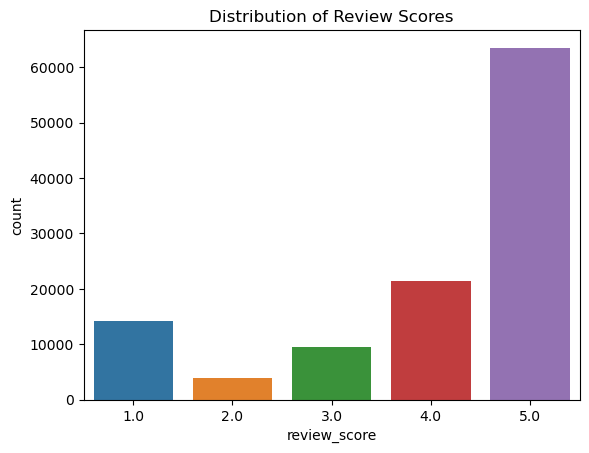

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of review scores
sns.countplot(x='review_score', data=final_data)
plt.title('Distribution of Review Scores')
plt.show()


This helps visualize the frequency of each score (e.g., how many customers left 5-star vs. 1-star reviews).

#### Sales Distribution
Check the distribution of sales (e.g., price).

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


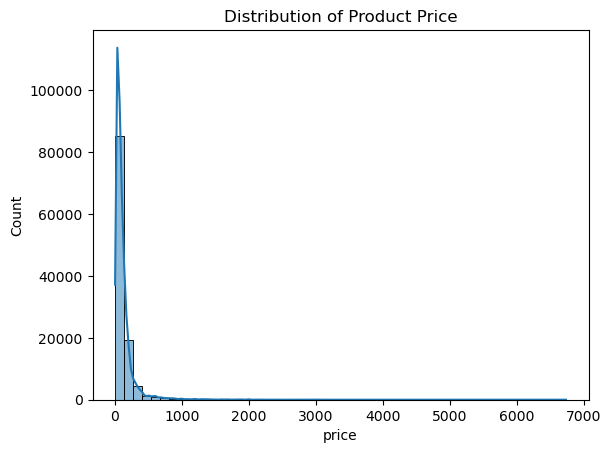

In [84]:
# Plot distribution of price (based on the available columns)
sns.histplot(final_data['price'], bins=50, kde=True)
plt.title('Distribution of Product Price')
plt.show()

### Bivariate Analysis
#### Relationship Between Review Scores and Price
Check if there’s any relationship between review scores and product price.

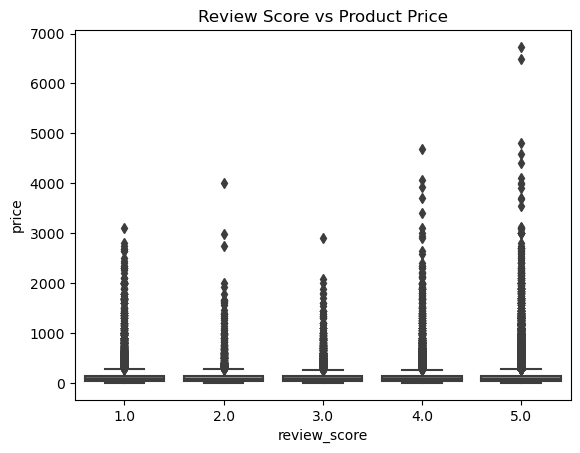

In [86]:
# Scatter plot to visualize the relationship between review scores and price
sns.boxplot(x='review_score', y='price', data=final_data)
plt.title('Review Score vs Product Price')
plt.show()


#### Order Status Analysis
Analyze how order status affects the delivery times and customer satisfaction.

In [114]:
# Convert to datetime
final_data['order_delivered_customer_date'] = pd.to_datetime(final_data['order_delivered_customer_date'], errors='coerce')
final_data['order_purchase_timestamp'] = pd.to_datetime(final_data['order_purchase_timestamp'], errors='coerce')


In [115]:
# Calculate delivery time in days
final_data['delivery_time'] = (final_data['order_delivered_customer_date'] - final_data['order_purchase_timestamp']).dt.days


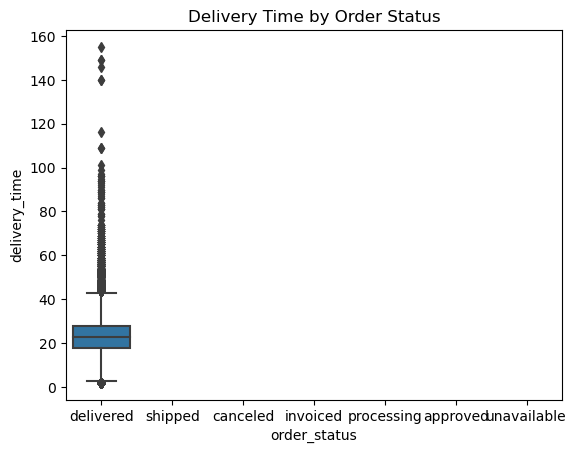

In [133]:
# Box plot of delivery time based on order status
sns.boxplot(x='order_status', y='delivery_time', data=final_data)
plt.title('Delivery Time by Order Status')
plt.show()


### Sales Trends Analysis
#### Sales Over Time
Visualize sales trends over time (e.g., by month, year).

In [153]:
final_data['purchase_year_month'] = final_data['order_purchase_timestamp'].dt.to_period('M')

In [154]:
final_data['purchase_year_month'] = pd.to_datetime(final_data['order_purchase_timestamp']).dt.to_period('M')

In [155]:
final_data.dtypes

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       float64
product_width_cm                        float64
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetim

In [156]:
final_data.payment_value.isna().sum()

3

In [159]:
final_data.payment_value.fillna(0,inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


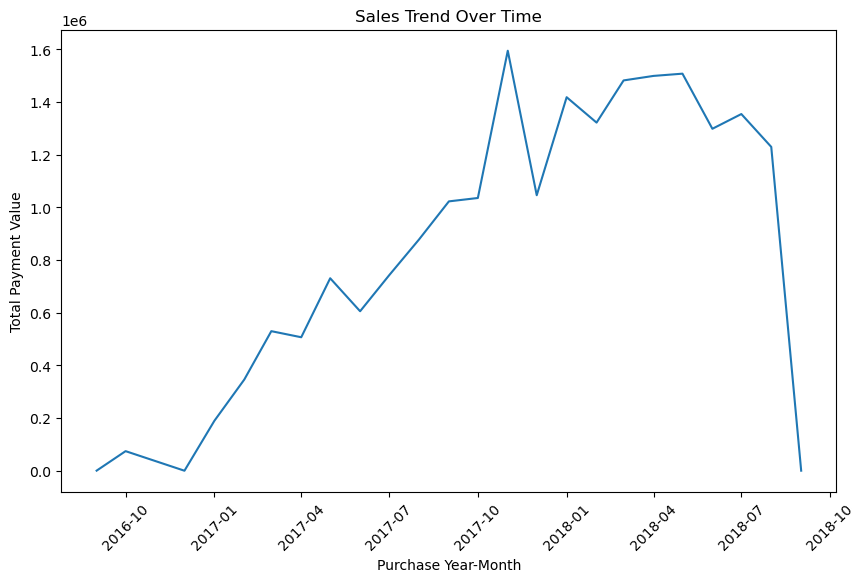

In [169]:
# Plot sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_trends, x='purchase_year_month', y='payment_value')
plt.title('Sales Trend Over Time')
plt.xlabel('Purchase Year-Month')
plt.ylabel('Total Payment Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.show()


### Product Category Analysis
#### Top Product Categories by Sales
Analyze which product categories generate the highest sales.

In [179]:
final_data = final_data.merge(
    product_CNT,
    on='product_category_name',
    how='left'  # Ensure 'left' is in lowercase
)


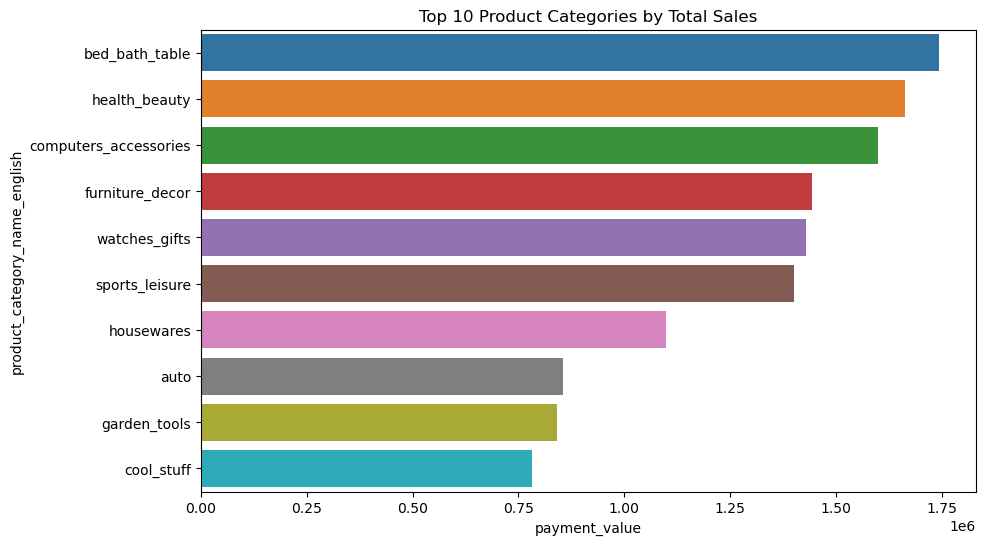

In [182]:
# Group by product category and sum total sales
category_sales = final_data.groupby('product_category_name_english')['payment_value'].sum().reset_index()

# Sort by total sales in descending order
category_sales_sorted = category_sales.sort_values(by='payment_value', ascending=False)

# Plot top categories by sales
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_value', y='product_category_name_english', data=category_sales_sorted.head(10))
plt.title('Top 10 Product Categories by Total Sales')
plt.show()


#### Top 10 Product Categories by most sold

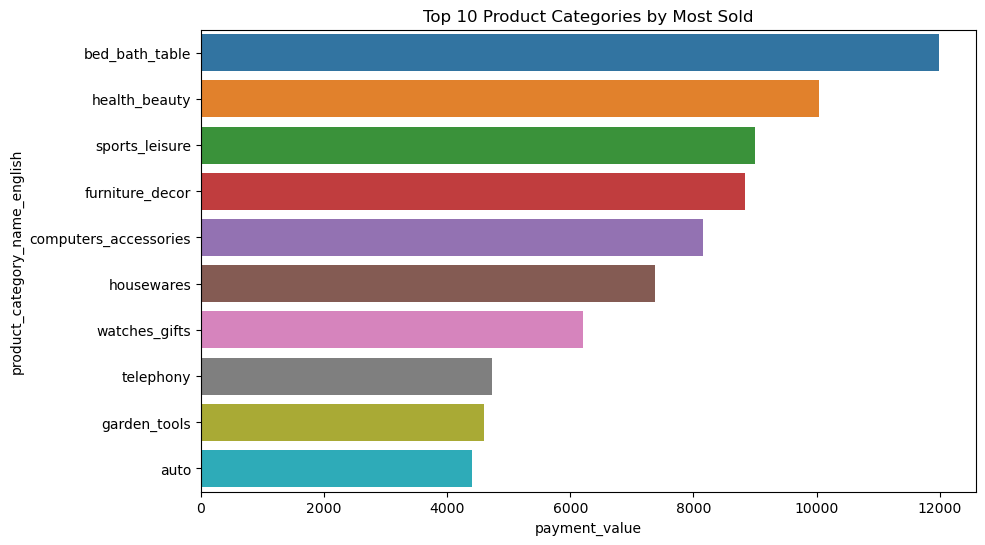

In [191]:
# Group by product category and sum total sales
category_sales = final_data.groupby('product_category_name_english')['payment_value'].count().reset_index()

# Sort by total sales in descending order
category_sales_sorted = category_sales.sort_values(by='payment_value', ascending=False)

# Plot top categories by sales
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_value', y='product_category_name_english', data=category_sales_sorted.head(10))
plt.title('Top 10 Product Categories by Most Sold')
plt.show()


In [267]:
final_data.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1252
order_delivered_customer_date    2587
order_estimated_delivery_date       0
review_id                         978
review_score                      978
review_comment_title              978
review_comment_message            978
review_creat

In [253]:
# creating the on_time_delivery field for Further Analysis
final_data["on_time_delivery"]=final_data.order_delivered_carrier_date<=final_data.order_estimated_delivery_date

## Customer Lifetime Value (CLV) Analysis

#### 1.Aggregate Customer Revenue
To calculate CLV, we sum up the revenue for each customer across all their orders.

In [256]:
customer_clv=final_data.groupby('customer_id')["payment_value"].sum().reset_index()

In [258]:
customer_clv.columns=['customer_id','total_revenue']

In [261]:
customer_clv.sort_values(by='total_revenue',ascending=False).head(10)

,customer_id,total_revenue
8475,1617b1357756262bfa56ab541c47bc16,109312.64
73311,bd5d39761aa56689a265d95d8d32b8be,45256.00
73568,be1b70680b9f9694d8c70f41fa3dc92b,44048.00
2049,05455dfa7cd02f13d132aa7a6a9729c6,36489.24
12307,1ff773612ab8934db89fd5afa8afe506,30186.00
91284,ec5b2ba62e574342386871631fafd3fc,29099.52
89563,e7d6802668de6e74d0d6c56565bf2a24,22346.60
53921,8c20d9bfbc96c5d39025d77a3ba83d7f,21874.05
95427,f7622098214b4634b7fe7eee269b5426,19457.04
43599,71901689c5f3e5adc27b1dd16b33f0b8,19174.38


Top 10 Customers according to the revenue they made.

#### 2.Analyze Order Frequency and Average Order Value
In addition to total revenue, analyzing how often customers place orders (frequency) and their average order value helps us better understand customer segments.

In [275]:
# Calculate order frequency and average order value per customer
customer_analysis = final_data.groupby('customer_id').agg(
    total_revenue=("payment_value", 'sum'),
    total_orders=('order_id', 'count'),
    avg_order_value=("payment_value", 'mean')
).reset_index()

# Sort by total revenue in descending order
top_customers=customer_analysis.sort_values(by='total_revenue', ascending=False).head(10)
top_customers

,customer_id,total_revenue,total_orders,avg_order_value
8475,1617b1357756262bfa56ab541c47bc16,109312.64,8,13664.08
73311,bd5d39761aa56689a265d95d8d32b8be,45256.00,20,2262.80
73568,be1b70680b9f9694d8c70f41fa3dc92b,44048.00,20,2202.40
2049,05455dfa7cd02f13d132aa7a6a9729c6,36489.24,6,6081.54
12307,1ff773612ab8934db89fd5afa8afe506,30186.00,10,3018.60
91284,ec5b2ba62e574342386871631fafd3fc,29099.52,4,7274.88
89563,e7d6802668de6e74d0d6c56565bf2a24,22346.60,10,2234.66
53921,8c20d9bfbc96c5d39025d77a3ba83d7f,21874.05,11,1988.55
95427,f7622098214b4634b7fe7eee269b5426,19457.04,6,3242.84
43599,71901689c5f3e5adc27b1dd16b33f0b8,19174.38,6,3195.73


#### Visualize Top Customers
To present the findings, visualize the top customers using a bar chart or treemap.

a) Bar Chart: Top 10 Customers by Total Revenue

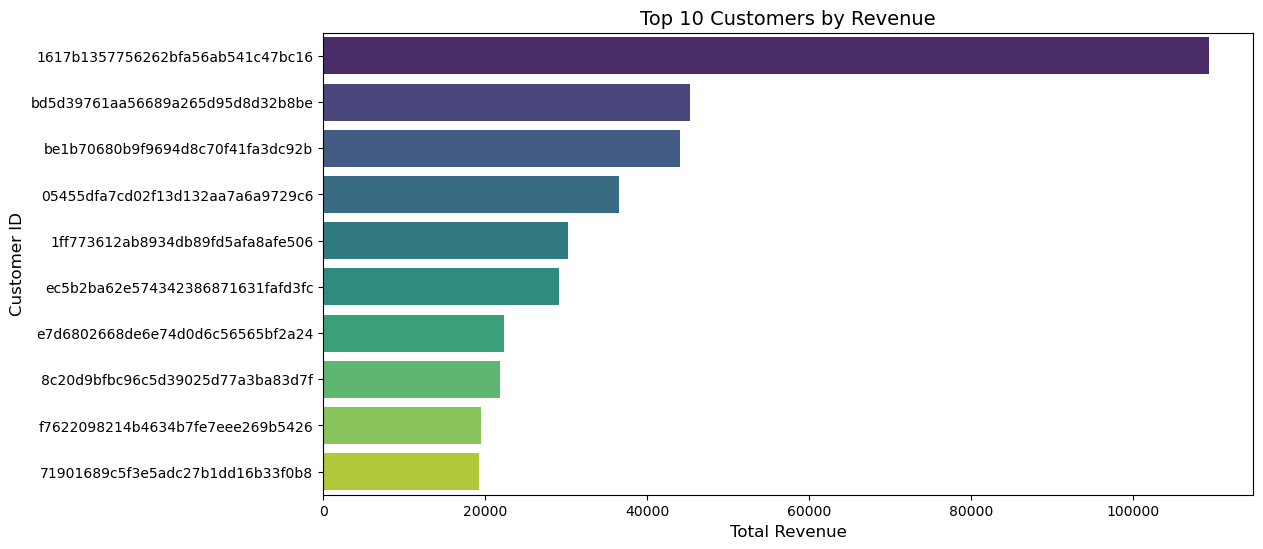

In [276]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='customer_id', data=top_customers, palette='viridis')
plt.title('Top 10 Customers by Revenue', fontsize=14)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.show()

b) Treemap: Proportional Revenue Contribution
    
A treemap can show the relative contribution of top customers to overall revenue.

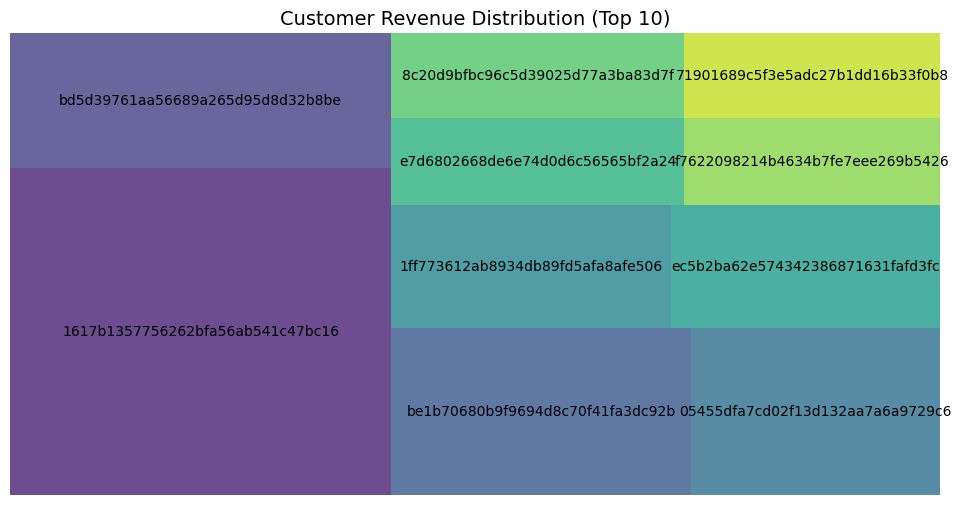

In [281]:
import squarify
sizes = top_customers['total_revenue']
labels = top_customers['customer_id']

# Create treemap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette("viridis", len(sizes)))
plt.title('Customer Revenue Distribution (Top 10)', fontsize=14)
plt.axis('off')
plt.show()

#### 4.Segment Customers
Segment customers based on revenue tiers (e.g., low, medium, high CLV) for better targeting.

a) Define Tiers:

High CLV: Top 10% of customers by total revenue.

Medium CLV: Middle 40%.

Low CLV: Bottom 50%.

In [284]:
# Define revenue thresholds
high_threshold = customer_analysis['total_revenue'].quantile(0.9)
low_threshold = customer_analysis['total_revenue'].quantile(0.5)

# Add a 'CLV Segment' column
customer_analysis['clv_segment'] = customer_analysis['total_revenue'].apply(
    lambda x: 'High' if x >= high_threshold else 'Medium' if x >= low_threshold else 'Low'
)

# View segmentation summary
print(customer_analysis['clv_segment'].value_counts())


clv_segment
Low       49331
Medium    39468
High       9867
Name: count, dtype: int64


b) Visualize Customer Segments:

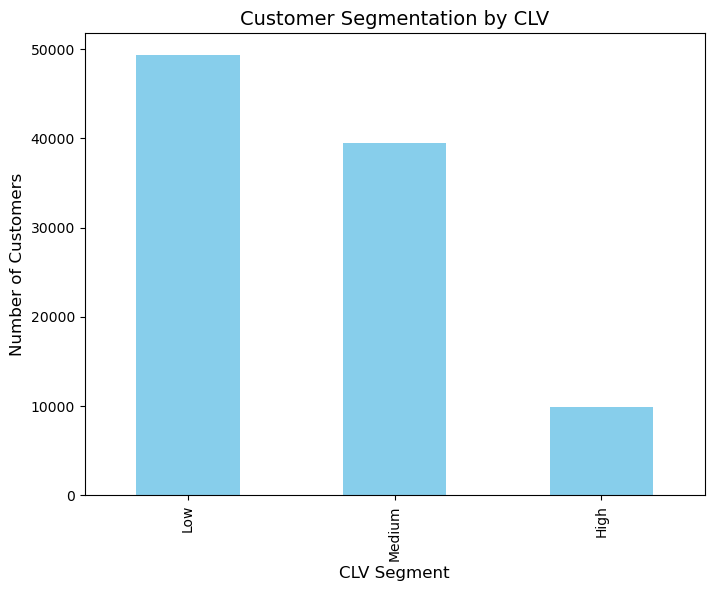

In [286]:
# Plot customer segmentation
plt.figure(figsize=(8, 6))
customer_analysis['clv_segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation by CLV', fontsize=14)
plt.xlabel('CLV Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()


## Sales Trends Analysis

#### 1: Monthly Sales Trends

a.Aggregate Revenue by Month

In [292]:

# Aggregate monthly revenue
monthly_sales = final_data.groupby('purchase_year_month')['payment_value'].sum().reset_index()

# Rename columns
monthly_sales.columns = ['month', 'total_revenue']

# Sort by month
monthly_sales = monthly_sales.sort_values(by='month')

# Display results
print(monthly_sales.head())


     month  total_revenue
0  2016-09         347.52
1  2016-10       74353.46
2  2016-12          19.62
3  2017-01      189570.02
4  2017-02      346280.99


b.Visualize Monthly Sales Trends: Use a line chart to show the revenue trend over time.

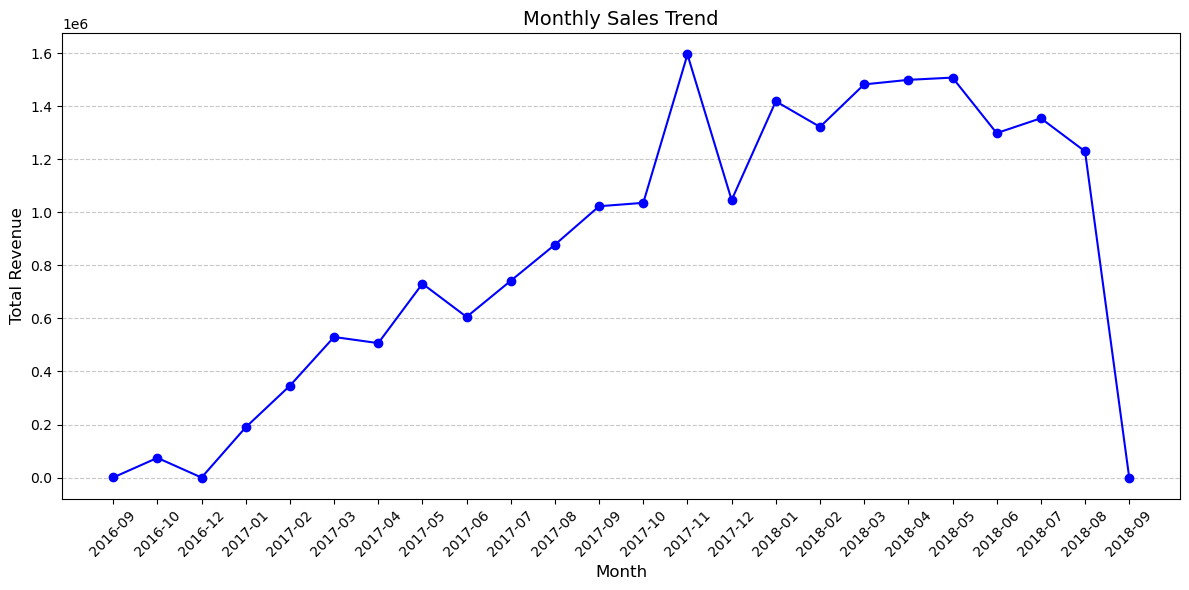

In [293]:
# Plot monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['total_revenue'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 2. Product Category Performance 

Identify top-performing product categories in terms of revenue and quantity sold.

a.Aggregate by Product Category: Analyze revenue and quantity sold per product category.

In [297]:
# Aggregate revenue and quantity sold by product category
category_performance = final_data.groupby('product_category_name_english').agg(
    total_revenue=('payment_value', 'sum'),
    total_quantity=('order_item_id', 'count')  # Assuming 'order_item_id' represents unique items
).reset_index()

# Sort categories by revenue
category_performance = category_performance.sort_values(by='total_revenue', ascending=False)

# Display top 10 categories
print(category_performance.head(10))


   product_category_name_english  total_revenue  total_quantity
7                 bed_bath_table     1743998.80           11988
43                 health_beauty     1662963.59           10032
15         computers_accessories     1599481.06            8150
39               furniture_decor     1443963.61            8832
70                 watches_gifts     1430553.48            6213
65                sports_leisure     1400223.07            9004
49                    housewares     1097900.09            7380
5                           auto      855095.68            4400
42                  garden_tools      840721.59            4590
20                    cool_stuff      781933.97            3999


b.Visualize Top Product Categories: Use a horizontal bar chart to highlight the top 10 product categories.

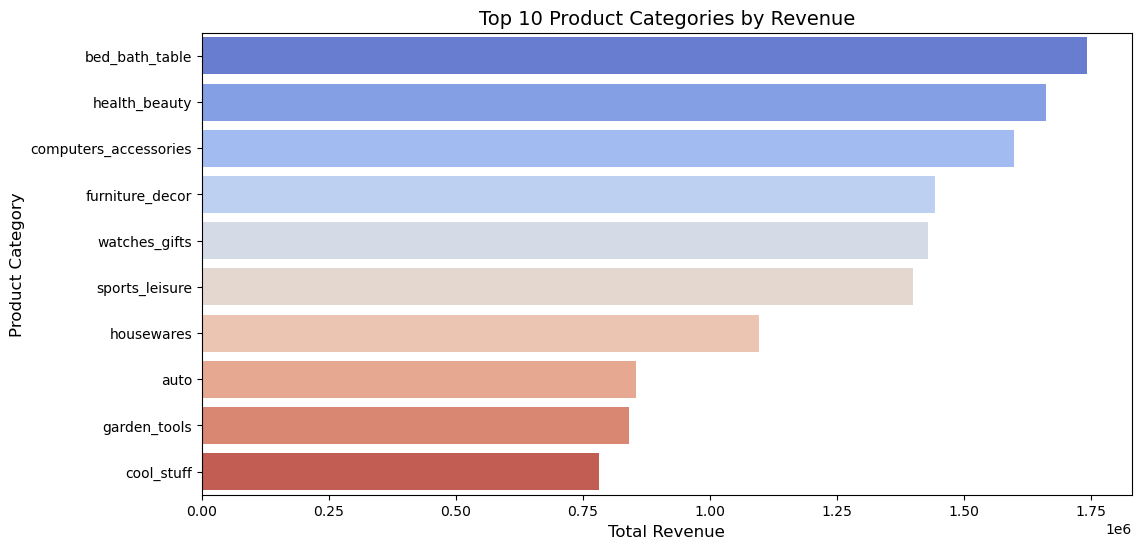

In [299]:
# Get top 10 categories
top_categories = category_performance.head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='product_category_name_english', data=top_categories, palette='coolwarm')
plt.title('Top 10 Product Categories by Revenue', fontsize=14)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()


#### 3.Identify Underperforming Categories

Spot product categories with low sales and revenue to evaluate possible causes (e.g., pricing, demand, or competition).

a.Filter for Low-Performing Categories: Identify categories with low revenue and low sales quantities.

In [300]:
# Define low performance threshold (adjust as needed)
low_revenue_threshold = category_performance['total_revenue'].quantile(0.25)
low_quantity_threshold = category_performance['total_quantity'].quantile(0.25)

# Filter underperforming categories
low_performance = category_performance[
    (category_performance['total_revenue'] <= low_revenue_threshold) &
    (category_performance['total_quantity'] <= low_quantity_threshold)
]

# Display results
print(low_performance)


        product_category_name_english  total_revenue  total_quantity
67             tablets_printing_image       10042.93              87
13                         cine_photo        9553.61              74
25                       dvds_blu_ray        7935.28              71
55                              music        6901.43              40
9                      books_imported        6701.89              62
41  furniture_mattress_and_upholstery        5998.54              41
58                     party_supplies        5966.31              46
27             fashio_female_clothing        5220.07              50
23                diapers_and_hygiene        4221.25              39
32                      fashion_sport        3685.01              31
52                         la_cuisine        2913.53              16
3               arts_and_craftmanship        2326.17              24
35                            flowers        2213.01              33
46                     home_comfor

b.Visualize Underperforming Categories: 

Use a scatter plot to show revenue vs. quantity sold for all categories, highlighting underperforming ones.

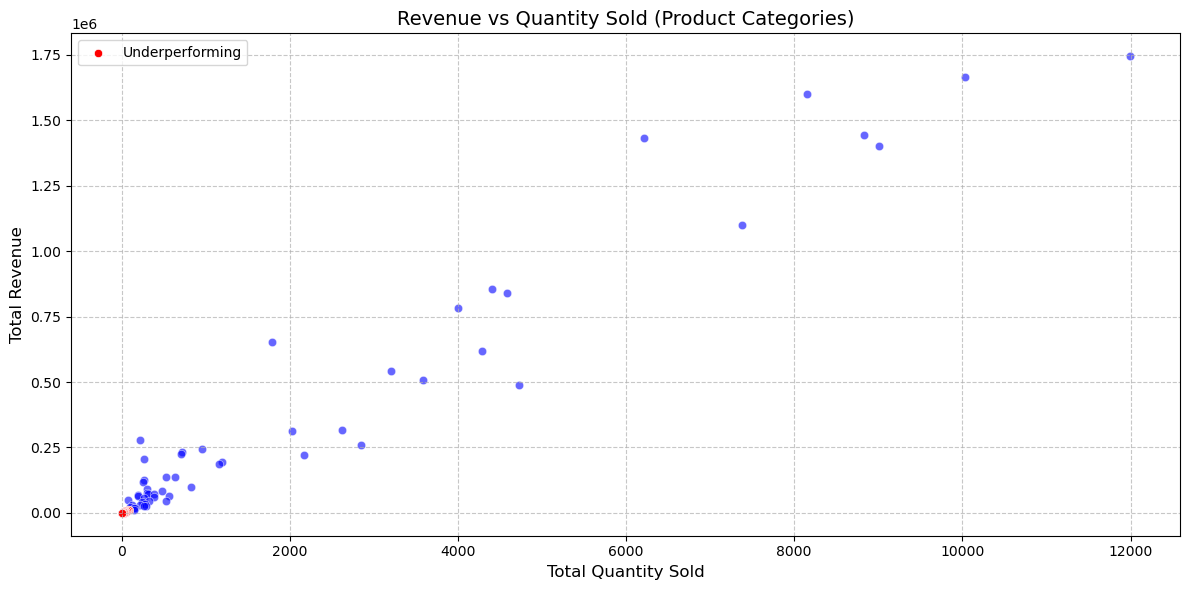

In [301]:
# Scatter plot of revenue vs quantity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=category_performance, x='total_quantity', y='total_revenue', color='blue', alpha=0.6)
sns.scatterplot(data=low_performance, x='total_quantity', y='total_revenue', color='red', label='Underperforming')
plt.title('Revenue vs Quantity Sold (Product Categories)', fontsize=14)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Delivery Performance Analysis

#### 1.Calculate Delivery Time Metrics

Calculate and analyze delivery duration, delays, and overall delivery efficiency.`

a.Create Delivery Time Metrics:
Calculate the actual delivery duration (actual_delivery_time).
Calculate the delay duration (delivery_delay), which is the difference between the actual and estimated delivery dates.

In [303]:
# Calculate actual delivery time and delay
final_data['actual_delivery_time'] = (final_data['order_delivered_customer_date'] - final_data['order_purchase_timestamp']).dt.days
final_data['delivery_delay'] = (final_data['order_delivered_customer_date'] - final_data['order_estimated_delivery_date']).dt.days

# Fill missing values with 0 (e.g., if no delay occurred)
final_data['delivery_delay'] = final_data['delivery_delay'].fillna(0)

# Display sample results
print(final_data[['order_id', 'actual_delivery_time', 'delivery_delay']].head())


                           order_id  actual_delivery_time  delivery_delay
0  00010242fe8c5a6d1ba2dd792cb16214                  15.0             0.0
1  00018f77f2f0320c557190d7a144bdd3                  18.0             0.0
2  000229ec398224ef6ca0657da4fc703e                  21.0             0.0
3  00024acbcdf0a6daa1e931b038114c75                  11.0             0.0
4  00042b26cf59d7ce69dfabb4e55b4fd9                  40.0             0.0


#### 2.Analyze Delivery Delays

Understand how often delays occur and their impact on overall performance.

Count Delayed Orders: Determine the number and percentage of delayed orders.

In [315]:
# Count delayed orders
delayed_orders = final_data[final_data['delivery_delay'] > 0]
num_delayed_orders = delayed_orders['order_id'].nunique()
total_orders = final_data['order_id'].nunique()

# Calculate percentage of delayed orders
delay_percentage = (num_delayed_orders / total_orders) * 100

print(f"Number of delayed orders: {num_delayed_orders}")
print(f"Percentage of delayed orders: {delay_percentage:.2f}%")


Number of delayed orders: 0
Percentage of delayed orders: 0.00%


b.Visualize Delay Distribution: Use a histogram to show the distribution of delays.

#### 3. Analyze Actual Delivery Times

Evaluate how long it generally takes for orders to be delivered.

In [343]:
# Summary statistics for actual delivery time
delivery_time_stats = final_data['actual_delivery_time'].describe()

print(delivery_time_stats)


count    115723.000000
mean         23.474236
std           8.814688
min           2.000000
25%          18.000000
50%          23.000000
75%          28.000000
max         155.000000
Name: actual_delivery_time, dtype: float64


Visualize Delivery Times: Use a box plot to show the distribution of delivery times.

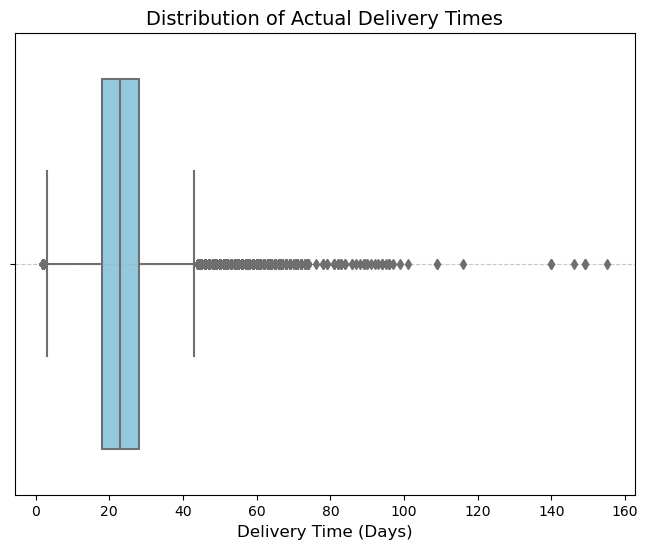

In [344]:
# Plot boxplot of actual delivery times
plt.figure(figsize=(8, 6))
sns.boxplot(data=final_data, x='actual_delivery_time', color='skyblue')
plt.title('Distribution of Actual Delivery Times', fontsize=14)
plt.xlabel('Delivery Time (Days)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 4.Segment Delivery Performance by Product Categories

Understand how delivery performance varies by product category.

a.Aggregate Delivery Metrics by Category: Analyze the average delivery time and percentage of delayed orders for each product category.

In [359]:
# Aggregate delivery performance by product category
delivery_by_category = final_data.groupby('product_category_name_english').agg(
    avg_delivery_time=('actual_delivery_time', 'mean'),
    delay_percentage=('delivery_delay', lambda x: (x > 0).mean() * 100)
).reset_index()

# Sort by average delivery time
delivery_by_category = delivery_by_category.sort_values(by='avg_delivery_time', ascending=False)

# Display results
print(delivery_by_category.head(10))
delivery_by_category_top10=delivery_by_category.head(10)

   product_category_name_english  avg_delivery_time  delay_percentage
57              office_furniture          31.457175               0.0
61         security_and_services          31.000000               0.0
31                 fashion_shoes          29.040293               0.0
12            christmas_supplies          26.690789               0.0
11             cds_dvds_musicals          26.428571               0.0
34               fixed_telephony          26.381679               0.0
45             home_appliances_2          26.019011               0.0
54                  market_place          25.880000               0.0
38             furniture_bedroom          25.857143               0.0
1               air_conditioning          25.401361               0.0


b.Visualize Delivery Performance by Category: Use a bar chart to compare average delivery times across categories.

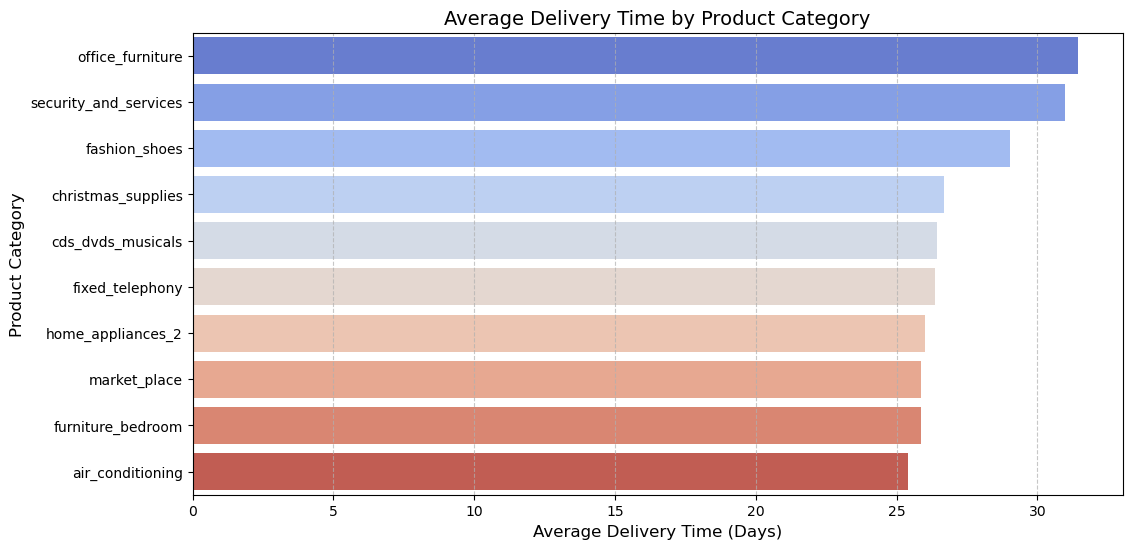

In [360]:
# Plot bar chart of delivery performance by category
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_delivery_time', y='product_category_name_english', data=delivery_by_category_top10, palette='coolwarm')
plt.title('Average Delivery Time by Product Category', fontsize=14)
plt.xlabel('Average Delivery Time (Days)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Customer Segmentation Analysis

#### 1.Perform RFM Analysis

Calculate Recency, Frequency, and Monetary value for each customer and assign RFM scores.

a.Prepare the Data: Extract necessary data for RFM calculation.

In [377]:
# Extract relevant columns
rfm_data = final_data[['customer_unique_id', 'order_purchase_timestamp', 'payment_value']]

# Define the reference date (latest order date in the dataset + 1 day)
reference_date = rfm_data['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Calculate R, F, and M values
rfm = rfm_data.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (reference_date - x.max()).days),
    Frequency=('order_purchase_timestamp', 'count'),
    Monetary=('payment_value', 'sum')
).reset_index()

# Display sample RFM data
print(rfm.head())


                 customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19
2  0000f46a3911fa3c0805444483337064      542          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      293          1    196.89


b.Normalize RFM Scores: Assign scores (1–5) to Recency, Frequency, and Monetary values, with 5 being the best score.

In [386]:
# Fill NaN values in 'Monetary' (ensure this step is done)
rfm['Monetary'] = rfm['Monetary'].fillna(0)  # Optionally use rfm['Monetary'].fillna(rfm['Monetary'].median())

# Define the bins for Monetary
monetary_bins = [0, 50, 200, 500, 1000, rfm['Monetary'].max()]

# Bin the Monetary values and assign scores
rfm['M_score'] = pd.cut(rfm['Monetary'], bins=monetary_bins, labels=[1, 2, 3, 4, 5], right=True)

# Explicitly set the categories for the M_score column before filling NaN
rfm['M_score'] = rfm['M_score'].cat.add_categories([0])  # Add 0 as a valid category

# Fill NaN values in M_score with 0
rfm['M_score'] = rfm['M_score'].fillna(0).astype(int)

# Calculate the overall RFM score
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# Display the first few rows to verify
print(rfm.head())


                 customer_unique_id  Recency  Frequency  Monetary  R_score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90        4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19        4   
2  0000f46a3911fa3c0805444483337064      542          1     86.22        1   
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62        2   
4  0004aac84e0df4da2b147fca70cf8255      293          1    196.89        2   

   F_score  M_score RFM_Score  
0        1        2       412  
1        1        1       411  
2        1        2       112  
3        1        1       211  
4        1        2       212  


In [388]:
rfm.isnull().sum()

customer_unique_id    0
Recency               0
Frequency             0
Monetary              0
R_score               0
F_score               0
M_score               0
RFM_Score             0
dtype: int64

#### 2.Segment Customers Based on RFM

Group customers into meaningful segments using their RFM scores.

a.Define Customer Segments: Create customer segments based on RFM scores.



In [389]:
# Define segments based on RFM scores
def segment_customers(row):
    if row['R_score'] == 5 and row['F_score'] == 5 and row['M_score'] == 5:
        return 'Champions'
    elif row['R_score'] >= 4 and row['F_score'] >= 4:
        return 'Loyal Customers'
    elif row['R_score'] >= 4:
        return 'Recent Customers'
    elif row['F_score'] >= 4:
        return 'Frequent Buyers'
    elif row['M_score'] >= 4:
        return 'Big Spenders'
    else:
        return 'Others'

rfm['Customer_Segment'] = rfm.apply(segment_customers, axis=1)

# Display segment counts
print(rfm['Customer_Segment'].value_counts())


Customer_Segment
Others              52919
Recent Customers    37952
Big Spenders         3983
Frequent Buyers       332
Loyal Customers       225
Champions               9
Name: count, dtype: int64


b.Visualize Customer Segments: Create a pie chart or bar chart to visualize the distribution of customer segments.

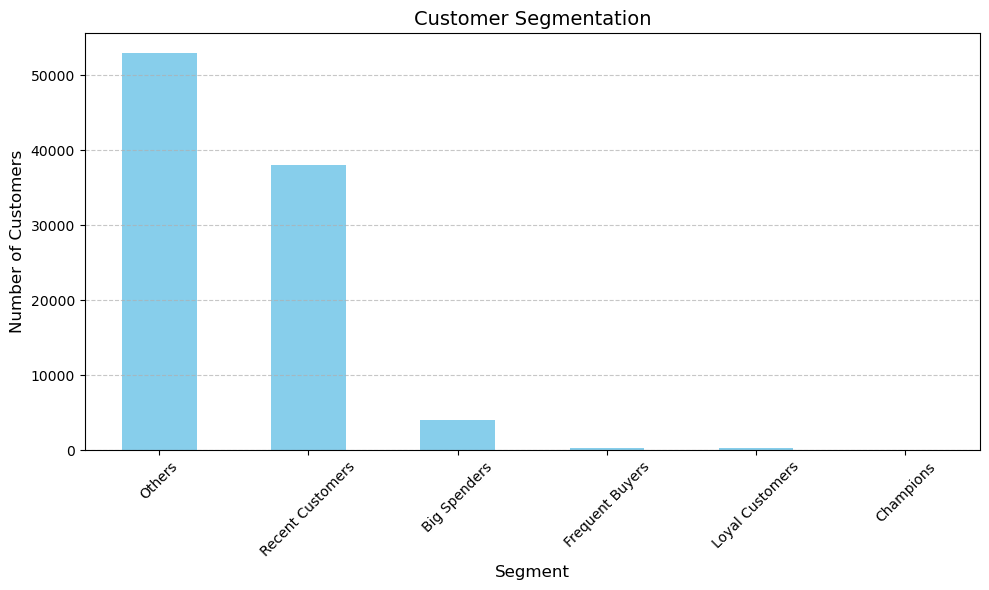

In [390]:
# Plot customer segments
plt.figure(figsize=(10, 6))
rfm['Customer_Segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 3.Insights from Customer Segments

Understand each segment and its contribution to the business.

a.Analyze Segment Contribution: Calculate the revenue and frequency for each segment.

In [392]:
# Merge RFM segments with the original data
rfm_merged = final_data.merge(rfm[['customer_unique_id', 'Customer_Segment']], on='customer_unique_id', how='left')

# Aggregate metrics by segment
segment_contribution = rfm_merged.groupby('Customer_Segment').agg(
    total_revenue=('payment_value', 'sum'),
    avg_frequency=('order_id', 'count'),
    num_customers=('customer_unique_id', 'nunique')
).reset_index()

# Display results
print(segment_contribution)


   Customer_Segment  total_revenue  avg_frequency  num_customers
0      Big Spenders     4110983.38           7840           3983
1         Champions       54549.85            119              9
2   Frequent Buyers      948528.35           2805            332
3   Loyal Customers      613146.03           1690            225
4            Others     7002079.46          60488          52919
5  Recent Customers     7687555.47          45368          37952


b.Visualize Revenue Contribution by Segment: Use a horizontal bar chart to show the revenue contribution of each segment.

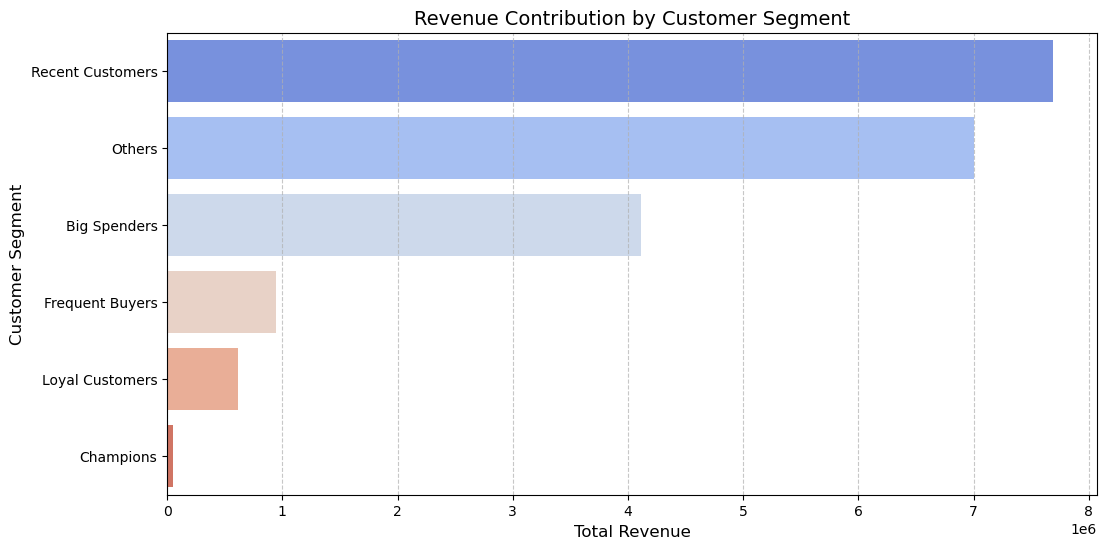

In [399]:
segment_contribution=segment_contribution.sort_values(by="total_revenue",ascending=False)
# Plot revenue contribution by segment
plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='Customer_Segment', data=segment_contribution, palette='coolwarm')
plt.title('Revenue Contribution by Customer Segment', fontsize=14)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Customer Segment', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Profitability and Cost Analysis

#### 1.Calculate Product Profitability

Determine the profitability of each product and product category.

a.Calculate Profit for Each Product

In [422]:
# Assuming 60% of price is the product cost
final_data['product_cost'] = final_data['price'] * 0.6
# Calculate profit for each order
final_data['profit'] = final_data['payment_value'] - final_data['product_cost'] - final_data['freight_value']


b.Visualize Product Profitability: Use a bar chart to visualize the top-performing products in terms of profitability.

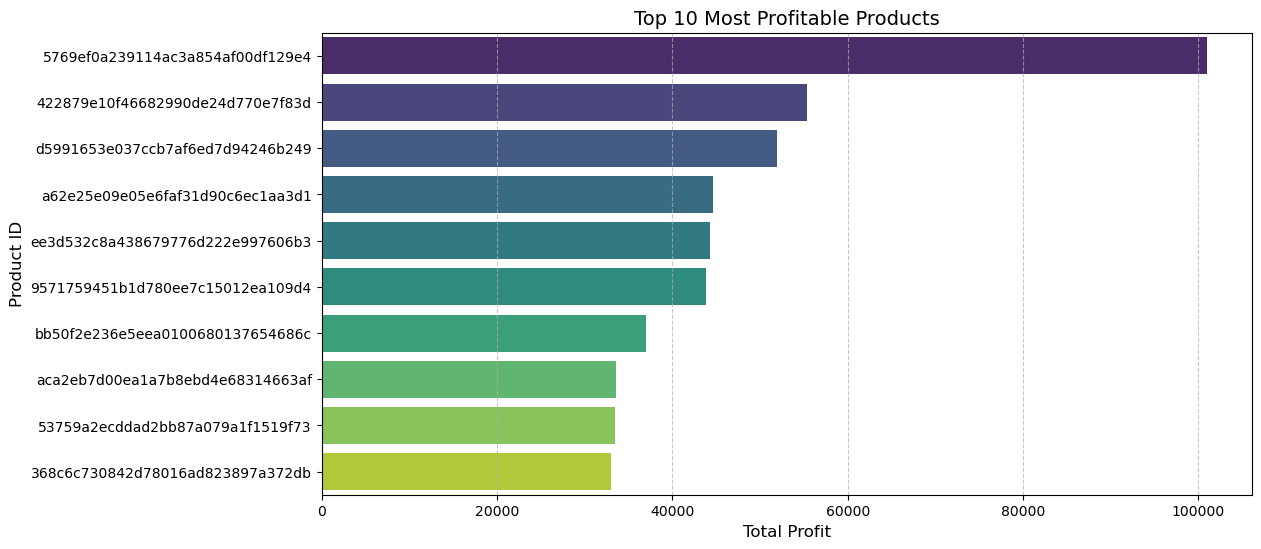

In [410]:
# Group by product and calculate total profit for each product
product_profit = final_data.groupby('product_id')['profit'].sum().reset_index()

# Sort by profit in descending order
product_profit = product_profit.sort_values(by='profit', ascending=False)

# Plot the top 10 profitable products
top_10_profitable_products = product_profit.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='profit', y='product_id', data=top_10_profitable_products, palette='viridis')
plt.title('Top 10 Most Profitable Products', fontsize=14)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Product ID', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


####  2.Profitability by Product Category

Evaluate profitability at the category level to understand which product categories are more profitable.

a.Aggregate Profit by Category: Calculate total revenue and profit by product category.

In [427]:
# Aggregate profitability by category
category_profitability = final_data.groupby('product_category_name_english').agg(
    total_revenue=('payment_value', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()

# Sort by total profit
category_profitability = category_profitability.sort_values(by='total_profit', ascending=False).head(10)

# Display results
print(category_profitability.sort_values(by="total_profit",ascending=False).head())


   product_category_name_english  total_revenue  total_profit
15         computers_accessories     1599481.06    875140.506
7                 bed_bath_table     1743998.80    859236.416
39               furniture_decor     1443963.61    797434.858
43                 health_beauty     1662963.59    692345.018
65                sports_leisure     1400223.07    606866.772


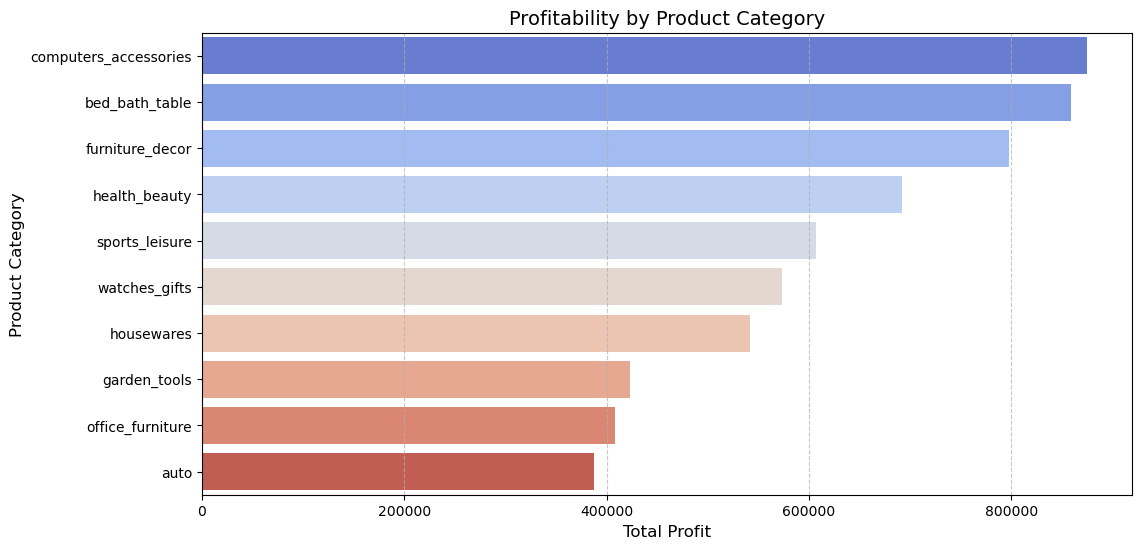

In [428]:

# Plot category profitability
plt.figure(figsize=(12, 6))
sns.barplot(x='total_profit', y='product_category_name_english', data=category_profitability, palette='coolwarm')
plt.title('Profitability by Product Category', fontsize=14)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#### 3.Total Profit and Revenue Overview

Summarize the overall profitability of the business, showing total revenue, cost, and profit.

a.Calculate Total Revenue, Cost, and Profit:

In [429]:
# Calculate total revenue, cost, and profit for the entire dataset
total_revenue = final_data['payment_value'].sum()
total_cost = final_data['product_cost'].sum() + final_data['freight_value'].sum()
total_profit = final_data['profit'].sum()

# Display overall results
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Cost (Product Cost + Freight Cost): ${total_cost:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")


Total Revenue: $20,416,842.54
Total Cost (Product Cost + Freight Cost): $10,934,251.44
Total Profit: $9,482,591.10


b.Visualize Profit and Revenue

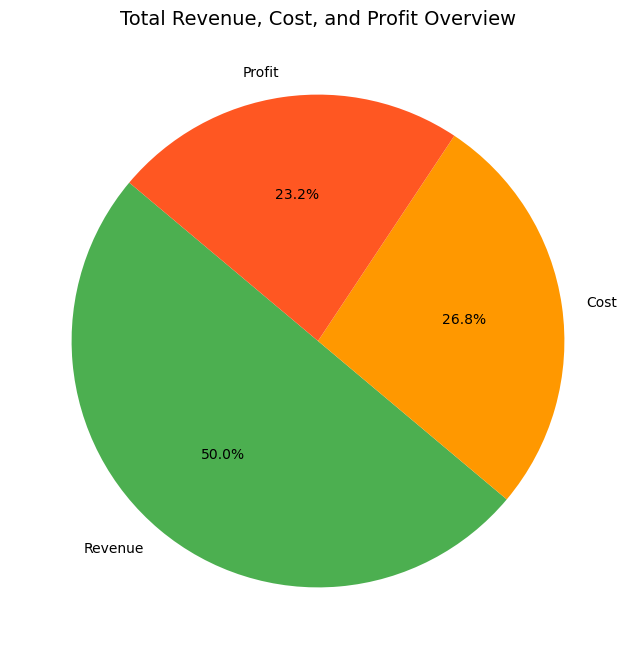

In [432]:
# Plot total revenue, cost, and profit
labels = ['Revenue', 'Cost', 'Profit']
values = [total_revenue, total_cost, total_profit]
colors = ['#4CAF50', '#FF9800', '#FF5722']

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue, Cost, and Profit Overview', fontsize=14)
plt.show()
